# **Data Science Internship Summer 2023 Report**

---

# **Background and Motivation for Projects 1 and 2**

## **Background**
- Studying the underlying connections between brain regions can yield new insights into how the brain functions as a whole. One such method which analyzes the movement of water throughout the brain is known as diffusion-weighted magnetic resonance imaging (dMRI).
- The cells of the nervous system are known as neurons, composed of cell bodies (somas), dendrites which receive incoming signals, and axon fibers which transmit those signals to other neurons. In the brain, collections of axons form bundles, which together comprise the white matter. The full set of fiber bundles is referred to as a connectome. Regions of somas and dendrites are gray matter. Along with these tissue types, the brain also has cerebrospinal fluid (CSF) which, in addition to other services, provides buoyancy for the brain.
- During dMRI, 3D brain volumes are divided into voxels and a dMRI signal is generated from each of these voxels in various orientations. The orientation which is most aligned with the fiber direction in that voxel will yield the largest signal since water diffuses the most along that trajectory. Fiber tractography is a process which can be applied to dMRI data in which fiber orientations per voxel are combined to generate streamlines which span the whole brain (Jeurissen et al. 2019). Integrating the generated pathways forms a tractogram.
- While connectomes and tractograms both demonstrate connections within the brain, connectomes represent actual tracks while tractograms are virtual representations. Tractograms can vary given a single connectome based on the fiber tracking algorithm employed. A single voxel is likely to have more than one tissue type and thousands of fibers in complex configurations, so no matter the efficacy of the tracking algorithm, tractograms are simply approximations of brain connectivity.
- There are two types of fiber tractography algorithms: deterministic and probabilistic. Deterministic models assume one orientation per voxel so are more prone to propagating errors from local modeling and integration. Probabilistic tracking algorithms combat this problem by generating fiber orientation distributions per voxel which are collectively used to decide the most probable trajectory (Jeurissen et al. 2019).
- Creating a tractogram first requires the diffusion signals per voxel to be related to its local fiber orientation. There are two main processes used. The first is a diffusion tensor which is best suited for voxels with a single fiber population. Otherwise, diffusion tensor imaging (DTI) often has poor results. Alternative processes use ‘higher-order’ models to more accurately represent voxels with multiple fiber populations. This type of tracking uses a fiber orientation distribution function (fODF) which models fibers as sphere functions (Jeurissen et al. 2019). DTI typically produces less credible tracts than higher order models, so the latter will be employed in these projects.
- The next step of the tractography process is combining individual fiber trajectories to generate long range streamlines. It begins by selecting a seed point (r0) and getting the local trajectory (v(r0)) where v(r) is the vector field (Jeurissen et al. 2019). To get to the next point on the streamline, follow that field for a specified distance, defined by the step size. Get that local orientation and repeat. This iterative process is called Euler integration. This bottom-up approach is limited when step size is too large or curvature is too high, as small errors early in the process can cause big problems down the line.
- Choosing those initial seed points will depend on the segmentation task at hand. Seed points can either be ROI-based or distributed throughout the brain. The former process would produce streamlines specifically between defined brain regions. Those regions can be identified with an atlas or using fMRI data. The latter process of using seed points throughout the brain is known as whole-brain tractography. This can be done by seeding from every voxel, or by seeding along the white matter-gray matter intersection as this is the interface at which fibers are known to originate/terminate. While seeding at every voxel assures whole-brain tracking, it is also likely to over-represent long range bundles.
- Streamline generation will end when a defined termination condition is met. Fractional anisotropy is often the measure used to terminate tracking with DTI. Fractional anisotropy (FA) characterizes fiber density and connectivity. Low FA indicates low probability for a trajectory, so dipping below a certain threshold will stop probing. Higher order tracking algorithms use the fiber orientation distribution function (fODF) threshold to determine when tracking should terminate. Curvature is also often used as a termination condition: if the angle between two successive steps is above a certain threshold, termination stops as this step could have been caused by noise in the data or a model error.

## **Motivation**
- White matter is challenging to study in humans in vivo and tools are not as widely available for dMRI as in other domains, like functional or structural imaging (FMRI, sMRI). The overall goal of this work is to automate processing pipelines for dMRI images. These pipelines use minimally processed images to segment white matter tracts and generate tract endpoint maps on the cortical surface. The automation process is done via machine learning using convolutional neural networks (CNNs).
- The first project, discussed in Chapter 1, focuses on entire-brain automated segmentation, meaning the extraction of all white matter tracts and their endpoints via deep learning methods. The second project, discussed in Chapter 2, focuses on the tracking of just auditory pathways via a suite of tools that automatically track and clean these white matter pathways. The goal of this work altogether is to reduce barriers of entry to performing in-vivo investigations into white matter by providing processing tools.



# **Project 1: White Matter Tract Endpoints**

## **1.1 Goal**
- The goal of this project overall is to create a deep learning (DL) model which uses just diffusion-weighted images to automatically segment white matter pathways and their cortical endpoints.
- Individual goals:
   - Preprocess dMRI images which will be used to train deep learning models
   - Generate the model created in the TractSeg paper as a starting point our models
   - Analyze the performance of the TractSeg model and then find ways to improve it
   - Compare results of different DL models

## **1.2 Methods**
- The model will be trained using data from 3 projects: a Human Connectome Dataset (HCP), a Pediatric Imaging, Neurocognition and Genetics Dataset (PING), and a Cambridge Centre for Ageing and Neuroscience dataset (Cambridge).




### 1.2.1 Preprocessing
- All three datasets require processing prior to model training. The applications used are shown in Figure 1, all of which were run on the Brainlife.io platform.
- After the tracts were generated, streamline endpoints were mapped to the cortical surface by segmenting the cortical surface and the white matter boundary into an equal number of points (Garyfallidis et al. 2012; Takemura et al. 2017). Then, the points are paired from one surface to the other and the amount of streamlines intersecting that area between each set of points is calculated. The streamline count can then be totaled or binarized so that 1 represents any number of tract endpoints and 0 represents no tract endpoints.

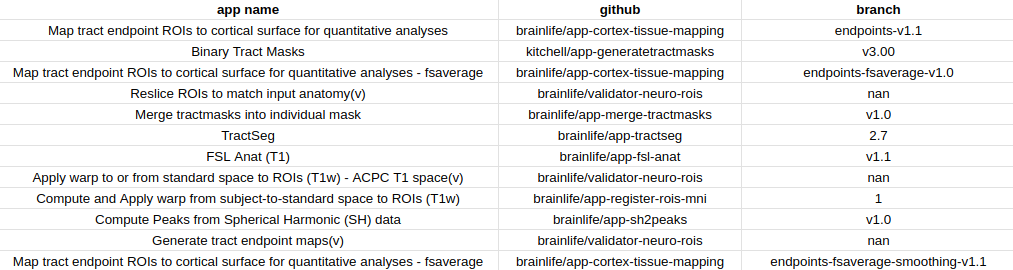

Figure 1. The applications run on BrainLife, their respective github page and branch.

### 1.2.2 Model Building
- The deep learning algorithm employed for model training is a u-net which is a fully-automated neural network that uses sparsely annotated images to perform white matter segmentation (Çiçek et al. 2016). This process is not specialized for a specific segmentation so it can have various applications.
- Tractography for dMRI currently requires complex, expensive pipelines. Direct segmentation is an alternative to ROI- or cluster-based segmentation that generates complete segmentations from the input volumes. TractSeg is a direct segmentation method that uses a FCNN that learns all tracts simultaneously (“TractSeg - Fast and Accurate White Matter Tract Segmentation” 2018). The model produced in that paper will be reproduced in our work as a starting point for our machine learning model. The original TractSeg model uses just HCP data, so we will then generalize it to different subjects and segmentation models. The different subjects will come from the other two data sources, PING and Cambridge, which have data on people from various age groups and locations. The other segmentation model used will be WMASeg which has slightly fewer and different track definitions, meaning the outputted model will be slightly different than that of TractSeg.


## **1.3 Results**

### 1.3.1 Endpoints Maps
- Figures 2-4 show the average cortex map between 10 subjects. The color maps represent endpoint density, red being where most endpoints are concentrated.
- Figure 2 shows the endpoints in the left hemisphere of the inferior longitudinal fasciculus (ILF) which connects the occipital and temporal lobes.



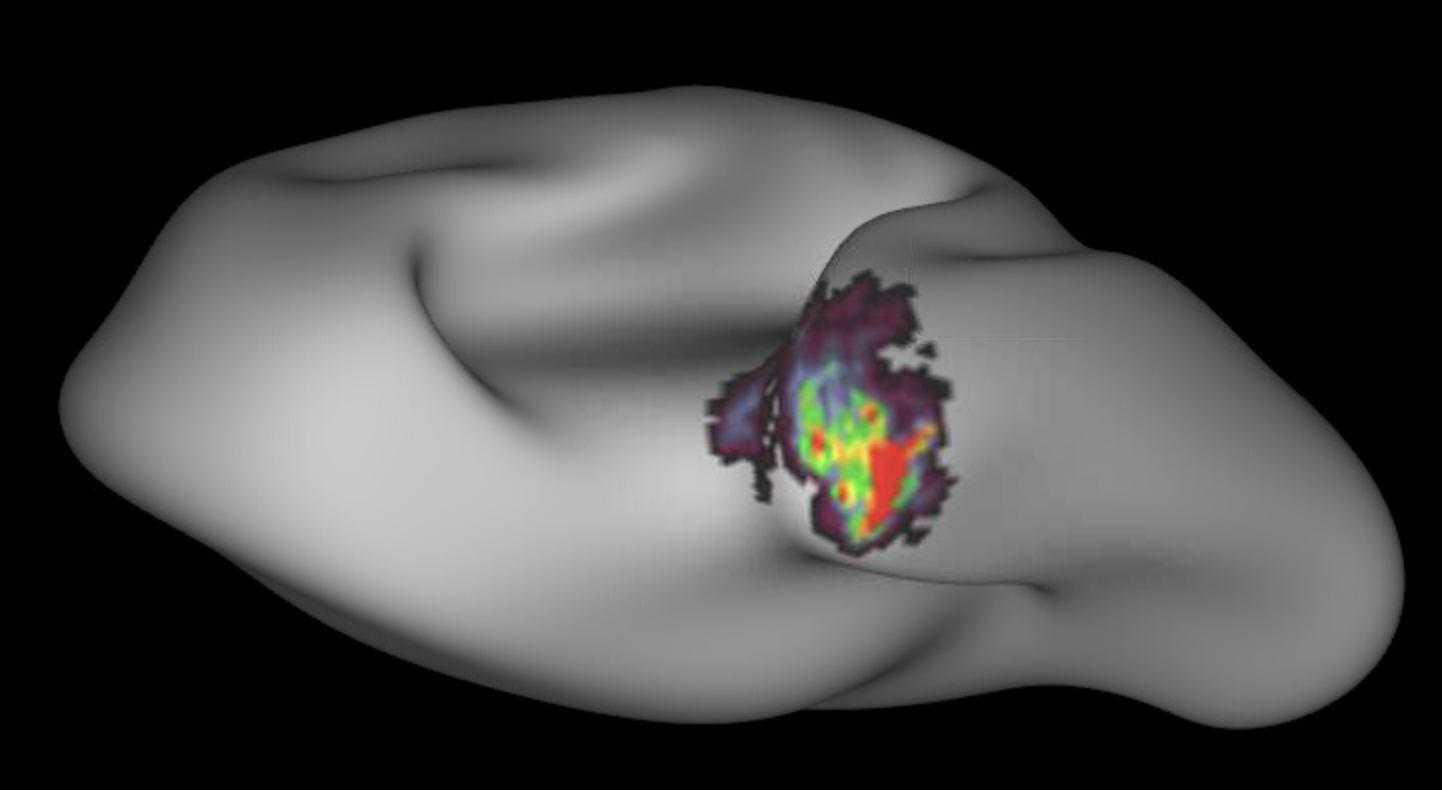

Figure 2. Endpoints in left hemisphere of ILF.

- Figure 3 shows the endpoints in the left hemisphere of the corticospinal tract (CST) which connects the spinal cord to the cerebral cortex.

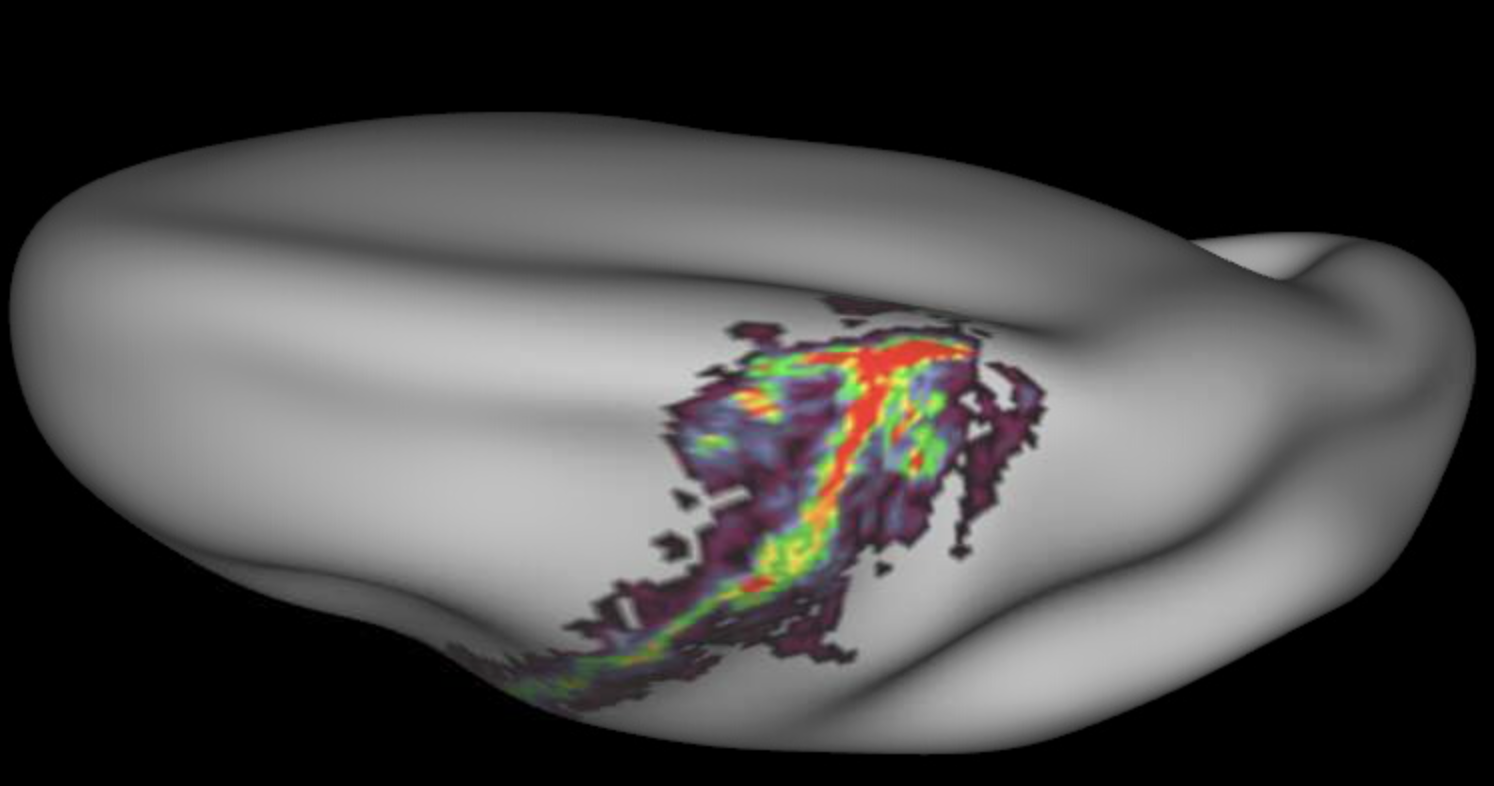

Figure 3. Endpoints in the left hemisphere of the CST.

- Figure 4 shows the endpoints in the left hemisphere of the arcuate fasciculus (AF) which connets Broca's area in the frontal lobe to Wernicke's area in the temporal lobe.

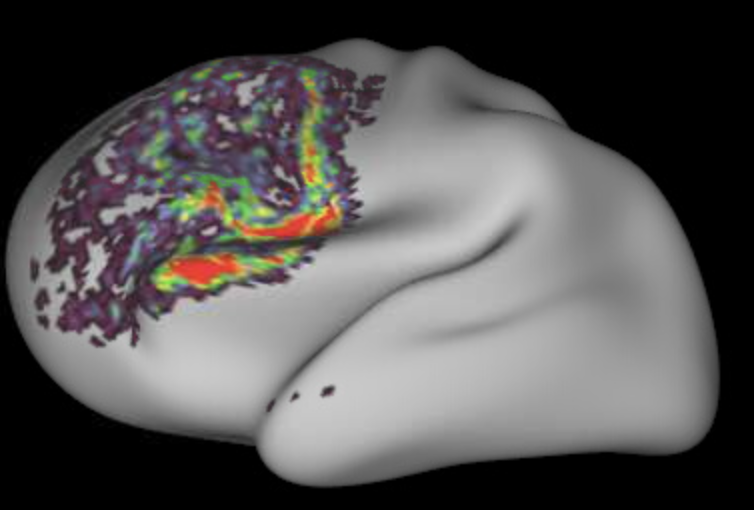

Figure 4. Endpoints in the left hemisphere of the AF.

### 1.3.2 Computational Requirements
- This project so far has generated 2855 cortex map data objects. These objects use 133.14 GB for storage.
- All of the data objects generated in this project require a computational resource. Each resource's utilization is shown in Figure 5.

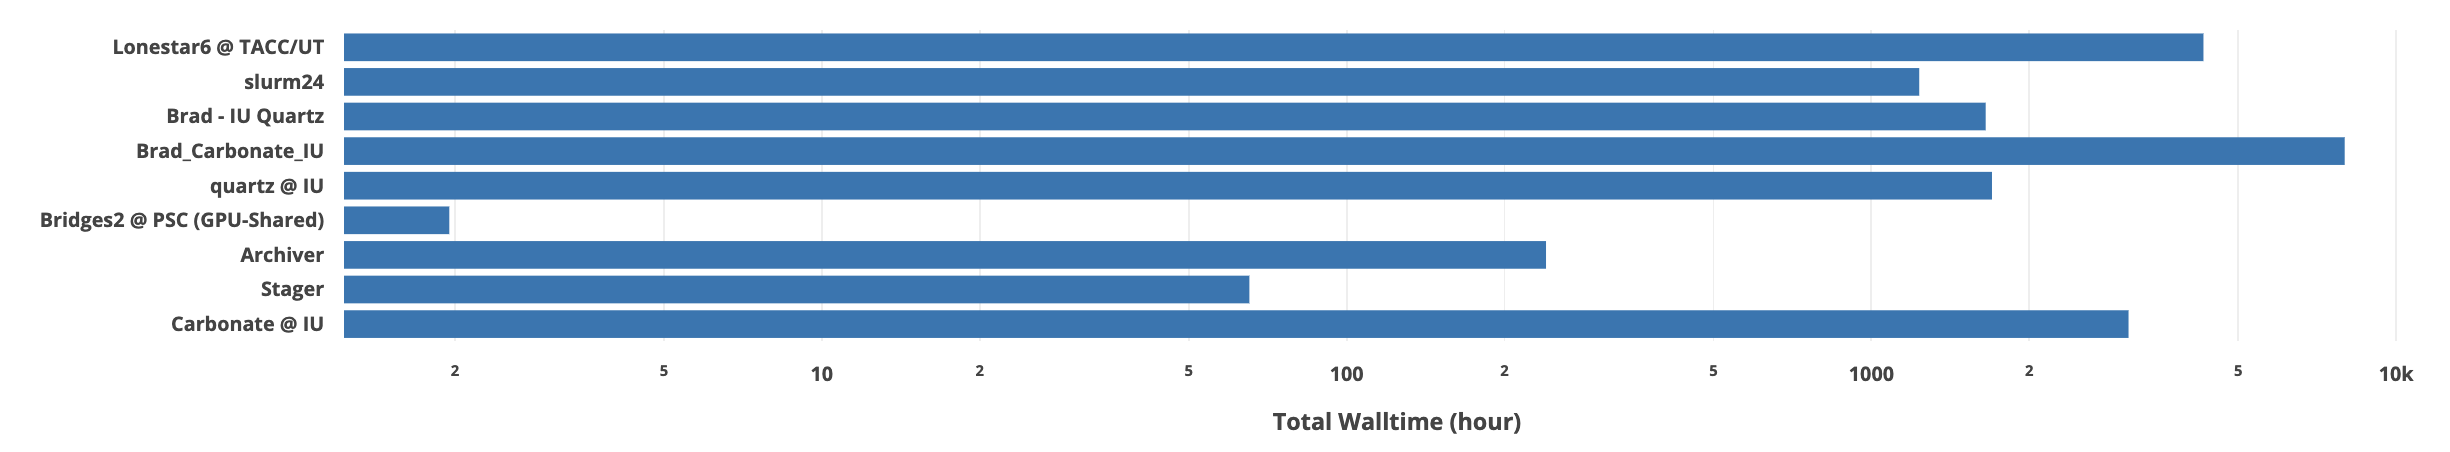

Figure 5. The resources used in this project and their associated walltime.

## **1.4 Future Direction**
- The next step in this project is to train the deep learning model on masks and peaks datatypes. Eventually, the model will take just the dwi data as input and automatically segment tracts and produce endpoint maps.


---

# **Project 2: Tracking Auditory Pathways**

## **2.1 Goal**
- The goal of this project is to develop tools for automatically tracking and cleaning white matter tracts in auditory pathways.
- Individual goals:
  - Confirm the existence of two distinct pathways from the thalamus to the auditory cortex
  - Test for the best set of parameters to be used to track between these ROIs
  - Assure quality of tracking using the optimal parameters
  - Follow a similar process as used in Project 1 to build a DL model for auditory white matter tracking

## **2.2 Methods**









### 2.2.1 Confirm Existence of Auditory Pathways
- The white matter pathways between the thalamus and auditory cortex (AC) support auditory processing. This project proposes that there are 2 structurally and funtionally distinct pathways between these ROIs. So, before any parameters are tested or models are built, we first have to prove that these separate tracts do exist.
- In order to demonstrate this efficiently, Trekker ROI Tracking was performed using the default segmentation parameters. Figure 6 is an example of those tractograms. It is obvious from these images altogether that there is two distinct pathways between the thalamus and AC.

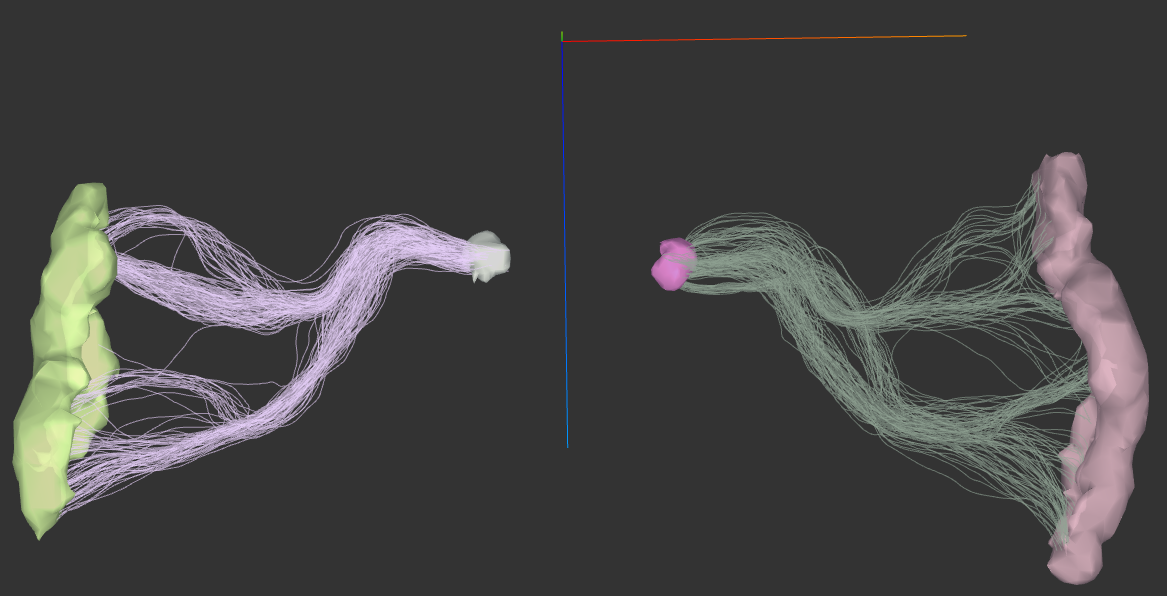

Figure 6. An example subject showing two distinct pathways between the thalamus and auditory cortex.

### 2.2.2 Parameter Selection
- After confirming the existence of two auditory pathways, and before the final segmentations could be generated, segmentation parameters were tested in order to identify the set of values which yields the most precise tractogram. The three parameters explored in this project were the step size, curvature, and minFODamp.
  - Step size, as previously discussed, determines the distance probed when generating successive streamline points. If the step size is too large, streamlines are vulnerable to noise in the data and estimation is poor for curvy pathways. If step size is too small, streamline generation becomes very computationally expensive. Typically, the step size is significantly smaller than the voxel size but large enough to minimize cost. The following step size values were tested: 0.05, 0.1, 0.2, 0.4, 0.5, 0.8 and 1.
  -  The curvature parameter restricts the angle at which a viable streamline can bend to avoid streamlines that turn suddenly or double back on themselves. Varying curvature will change the structure of the resulting tractogram. The curvature values tested were 0.25, 0.5, 1, 2, and 4.
  - The last parameter tested was the minimum fiber orientation distribution (FOD) amplitude. Local trajectories determined using the fODF are used to approximate the FOD. The minimum FOD amplitude parameter requires streamlines to reach a specified certainty in order to be considered viable. The minfodamp values tested were 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, and 0.5.
- In order to determine the optimal values, analyses were performed in Python using the tractmeasures datatype which contains streamline statistics (length, volume, count). The statistics per parameter value were averaged then plotted against each other so their results could be compared.

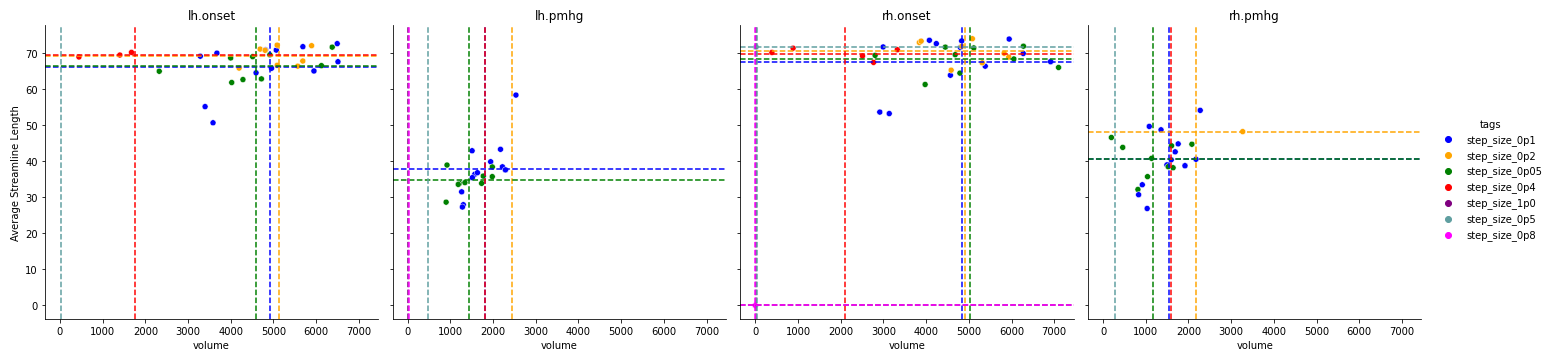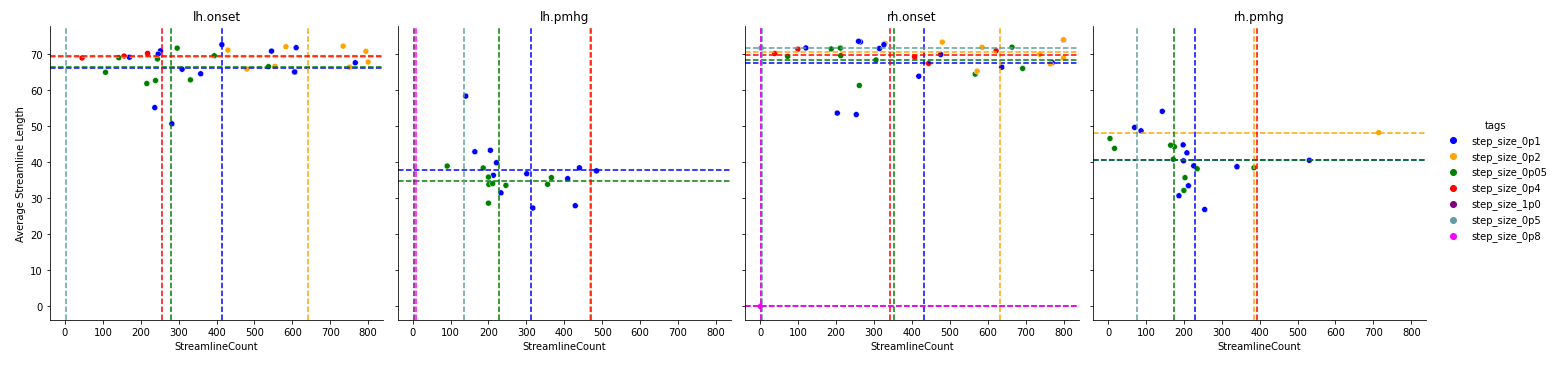

Figure 7 and 8. The volumes and streamline counts of white matter segmentations using different step size parameter values.

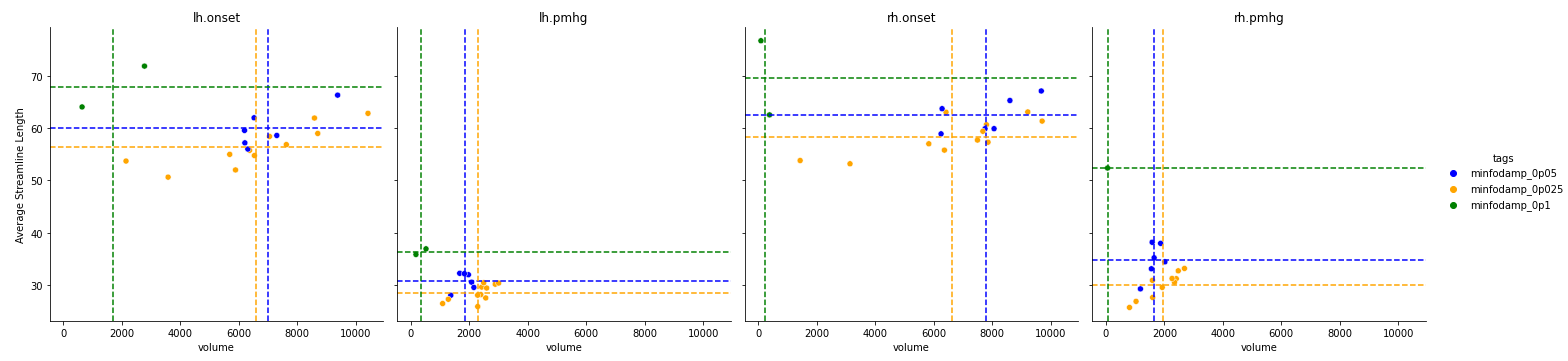

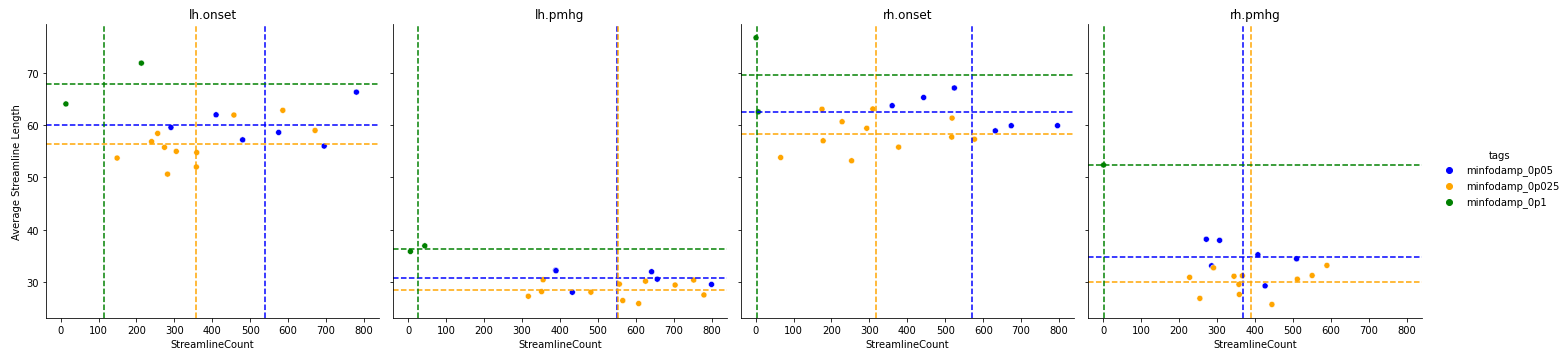

Figure 9 and 10. The volumes and streamline counts of white matter segmentations using different minimum FOD amplitude parameter values.

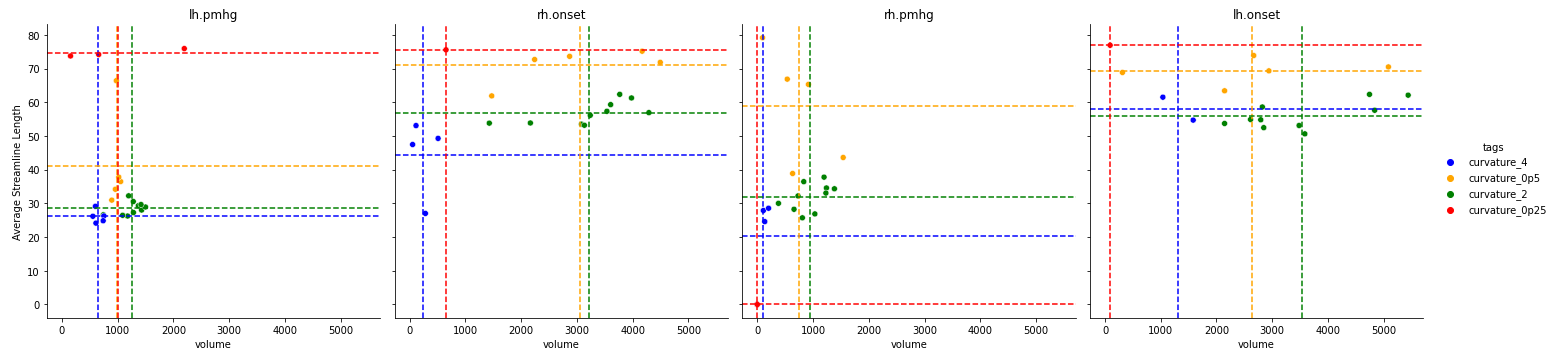

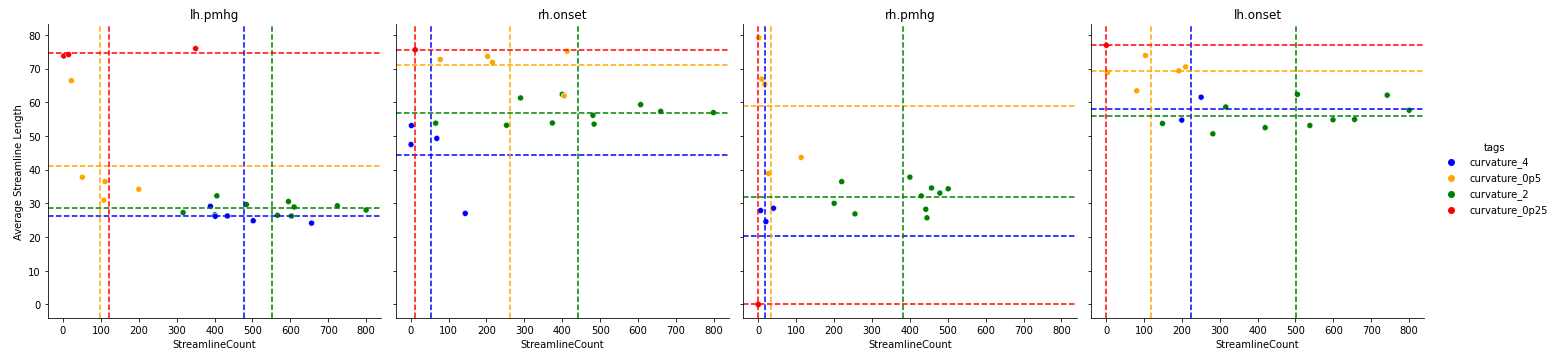

Figure 11 and 12. The volumes and streamline counts of white matter segmentations using different curvature parameter values.

- Overall, we decided to go with the default parameters for Trekker to establish whether or not Trekker (out of the box) was useful in identifying these tracts.
  - step size: 0.03
  - min FOD amplitude: 0.05
  - min radius of curvature: 0.625
- For future work on this project, we will reevaluate the best performing parameters and perform more parameter testing in the case of minimum radius of curvature

### 2.2.3 Preprocessing
- Once each optimal parameter was identified individually, tracking can be redone using all 3 optimal parameters. Regardless of parameter selection, the series of applications run on the BrainLife platform are shown in Figure 13.

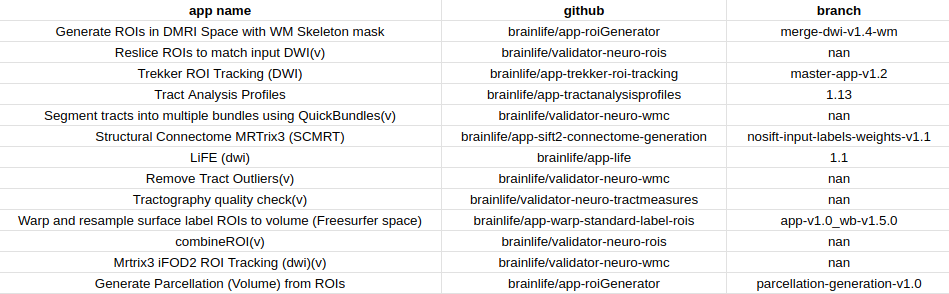

Figure 13. The applications run on BrainLife, their respective github page and branch.

## **2.3 Results**
- The 4 pathways which we tracked are the thalamus to AC onset and the thalamus to pmhg in both hemispheres.
- The macro statistics used to evalute the efficacy of the segmentation are the streamline count, volume and length. By nature of the brain's anatomy, we expect the tracts extending to the cortex to be longer and larger than tracts extending to the pmhg.
- The preliminary results shown here are based on tractograms segmented using  the default parameters, which the tracking algorithm decides based on the specific input.



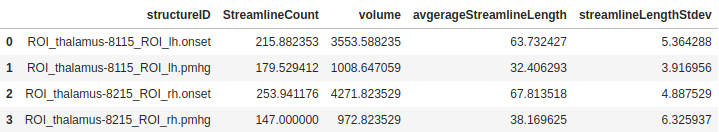

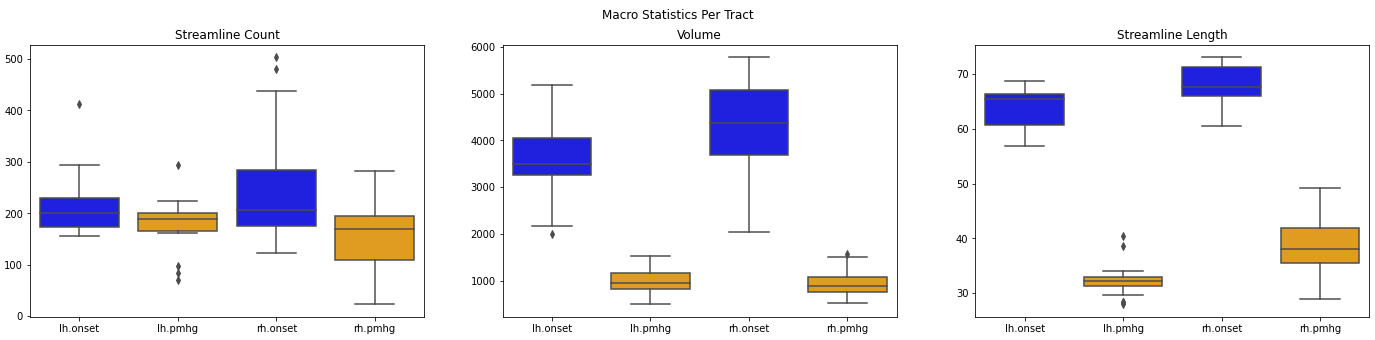

Figure 14 and 15. Macro statistics for the streamlines generated by Trekker with default parameters.

- As expected, we found that the onset tracts extending to the cortex in both hemispheres have a signifigantly larger volumes and lengths. The streamline counts between tracks are comparable.
- The micro statistics used to evalute the efficacy of a segmentation are FA, MD, AD, and RD.
  - Fractional anisotropy (FA) describes the direction of water movement. An FA of 0 would indicate that water moves equally in all directions. An FA of 1 would indicate that water moves strongly along one direction.
  - Mean diffusivity (MD) measures the amount of water movement, averaged over all orientations.
  - Axial diffusivity (AD) measures water movement parallel to fibers while radial diffusivity (RD) measures water movement perpendicular to fibers.

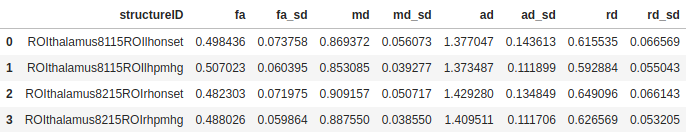

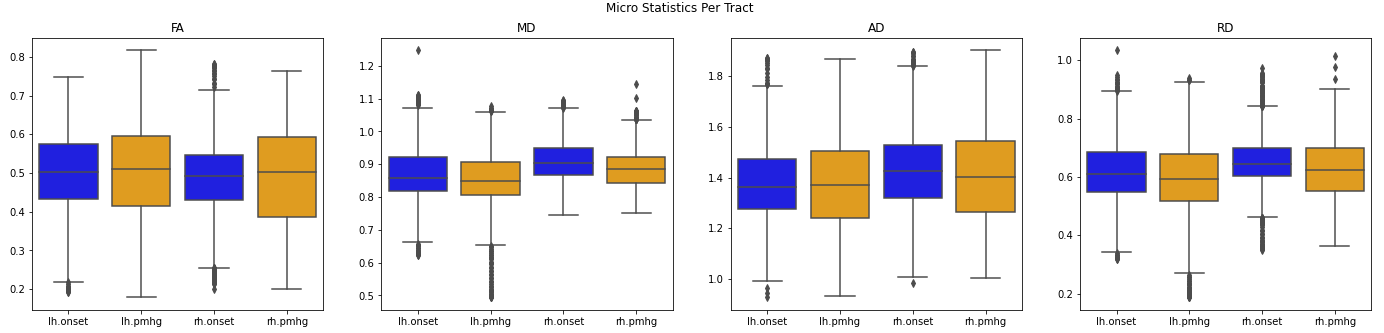

Figure 16 and 17. Micro statistics for the streamlines generated by Trekker with default parameters.

- These plots show that all 4 tracts have comparable micro statistics. This makes sense because the tracts overlap, so the voxels used for computing the statistics per tract are similar.

## **2.4 Future Directions**:
- The u-net structure discussed in 1.2.2 will also be implemented in this project to generate a DL model which can automatically track the two distinct auditory white matter pathways.
- Tracking between ROIs, here the AC and thalamus, can be done via two methods. The first is a direct segmentation of the whole brain, followed by the segmentation of tracts terminating at those ROIs. This approach is generally more computationally expensive because of its comprehesive nature. The second method is an ROI-to-ROI based tracking which only segments tracts termninating in the pre-defined regions. Both methods will be implemented in this project to determine the most efficient method of segmenting these auditory pathways.
- Parameter selection for single algorithm tractography methods can cause errors in segmentation as the optimal parameter values will vary based on the brain region and tract being segmented. The generated connectomes will therefore be biased towards a certain tract property, like long or short range tracts. Ensemble Tractography (ET) is a solution to this issue. ET is the process of creating single parameter connectomes (SPCs) using single algorithms and then combining streamlines into a candidate connectome (Takemura et al. 2016). This candidate connectome is optimized using a streamline selection process to create the Ensemble Tractography Connectome (ETC) which includes streamlines from all SPCs. This ETC better represents diffusion in the brain than any single SPC. The idea of using multiple parameters during the tractography process may be later implemented in this project to improve the tractogram quality.




---


# **Project 3: BrainLife Usage Statistics Dashboard**

## **3.1 Goal**
- The overall goal of this project is to use BrainLife (BL) usage statistics to create plots and display them on the BL platform.
- Individual goals:  
 - Learn to use Tableau software for visualizing data
 - Create plots and dashboards for displaying BrainLife statistics
 - Connect the dashboards to BrainLife so that they are displayed on the website and automatically update based on current data


## **3.2 Methods**

- Before a dashboard can be constructed, each plot must be individually created based on a single dataset.
- Overall, 6 datasets were used to construct the dashboards.
  - The total_jobs_walltime dataset contains the amount of walltime used and jobs run per month since BrainLife started. It was used to construct 2 line graphs, one  representing the cumulative walltime used since the start of BrainLife and the other representing the cumultive job count since the start of BrainLife.
  - The jobs_walltime_per_app dataset contains the job count and walltime used per month, per app. It was used to construct 2 multiple lines graphs, one showing the cumulative walltime and the other showing cumulative job count, both separated by app. These plots allow us to determine the apps which were used most frequently, per month.
  - The jobs_walltime_per_user dataset contains the job count and walltime used per month, per user. It was used to construct 2 multiple lines graphs, one showing the cumulative walltime and the other showing cumulative job count, both separated by user. These plots allow us to determine the users which used the most walltime and ran the most jobs per month.
  - The jobs_walltime_per_resource dataset contains the job count and walltime used per month, per resource. It was used to construct 2 multiple lines graphs, one showing the cumulative walltime and the other showing cumulative job count, both separated by resource. These plots allow us to determine the resources which used the most walltime and ran the most jobs per month.
  - The jobs_walltime_per_project dataset contains the job count and walltime used per month, per project. It was used to construct 2 multiple lines graphs, one showing the cumulative walltime and the other showing cumulative job count, both separated by project. These plots allow us to determine the projects which used the most walltime and ran the most jobs per month.
  - The active_users_count_walltime dataset contains information the count of active users per month, as well as the jobs run and walltime used. It was used to constuct a line graph showing the amount of active users on BL per month.


## **3.3 Results**
- Once all of the individual plots were created, I combined them into a 3 dashboards based on their content.
- Figure 18 is intended to be the main page users are directed to when viewing BL statistics. It contains the trends of cumulative walltime, job count, and object count, as well as the total number of active users over time.


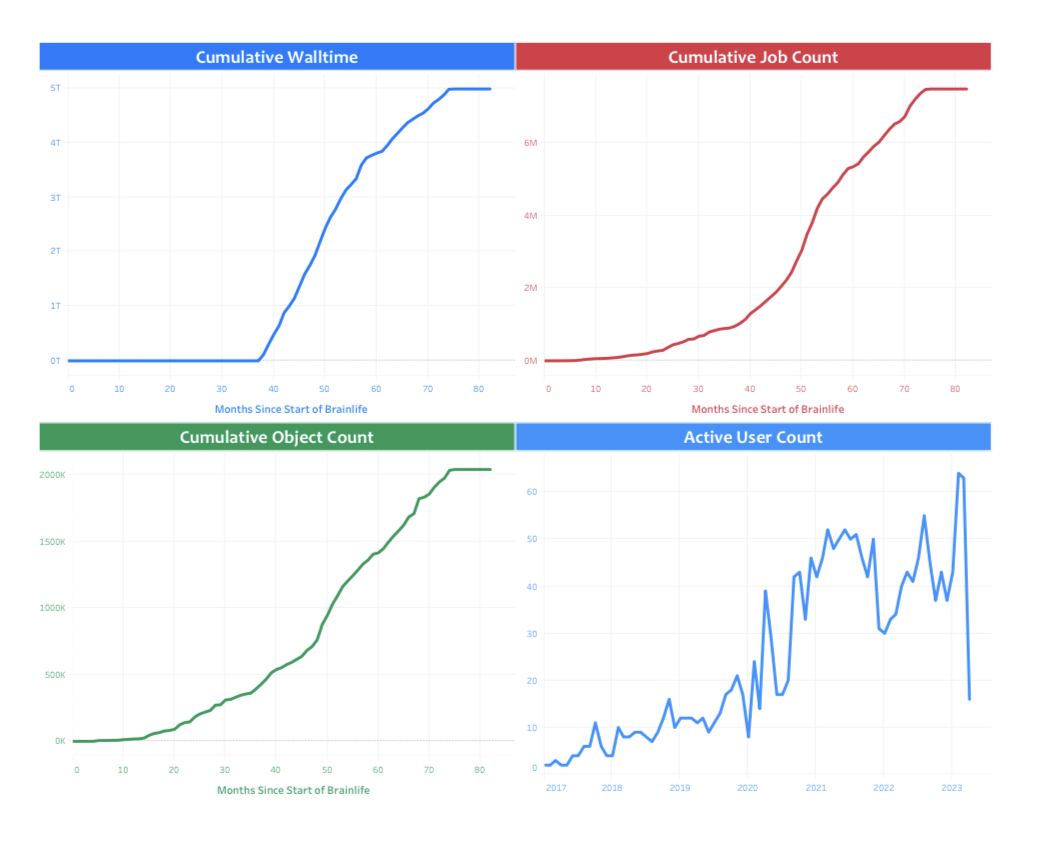

Figure 18. The main page showing overall cumulative statistics, including walltime, object count, job count, and user count.

- These plots show that the overall usage of BL to run jobs and produce objects has increased over time. The active users plot also shows that the number of BL users has generally increased over time, with some month-to-month flucuations.

- Figure 19 is a dashboard containing data on cumulative walltime broken down by user, project, app, and resource.
- These plots allow us to see how walltime is broken down by many factors and which specific app or resource is most used.

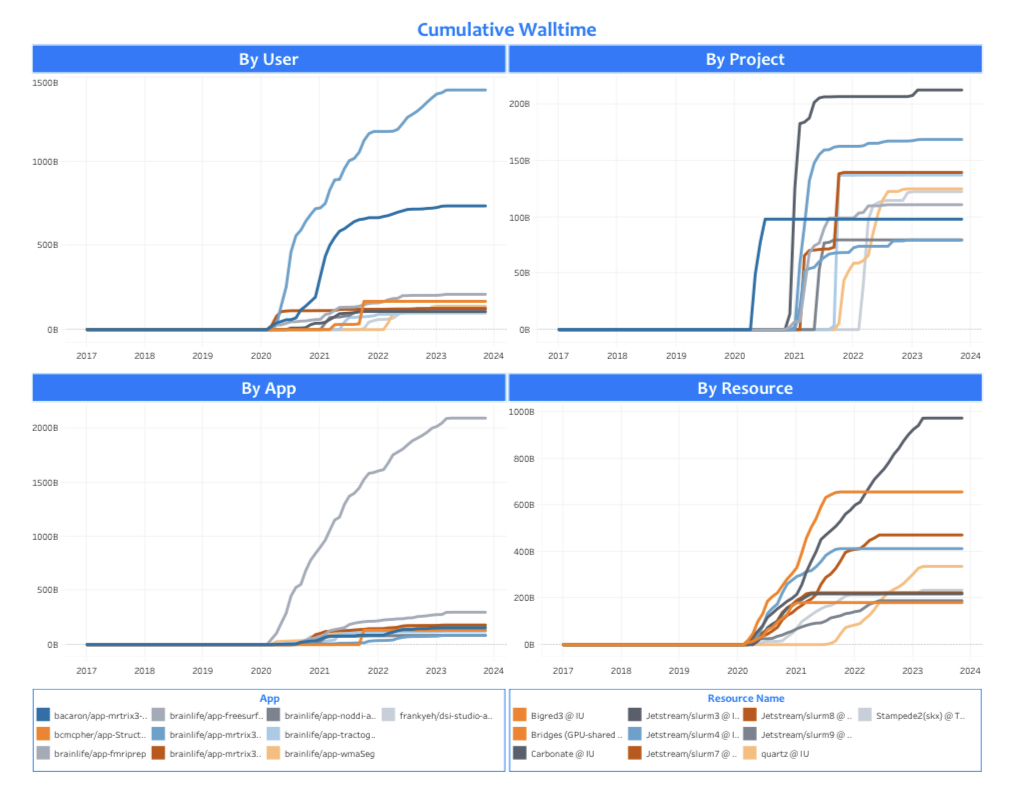

Figure 19. Walltime broken down by project, user, resource, and app.

- Figure 20 is a dashboard representing trends of cumulative job counts broken down by project, user, resource, and app.
- These plots allow us to see how job count is broken down by many factors and which specific app or resource ran the most jobs.

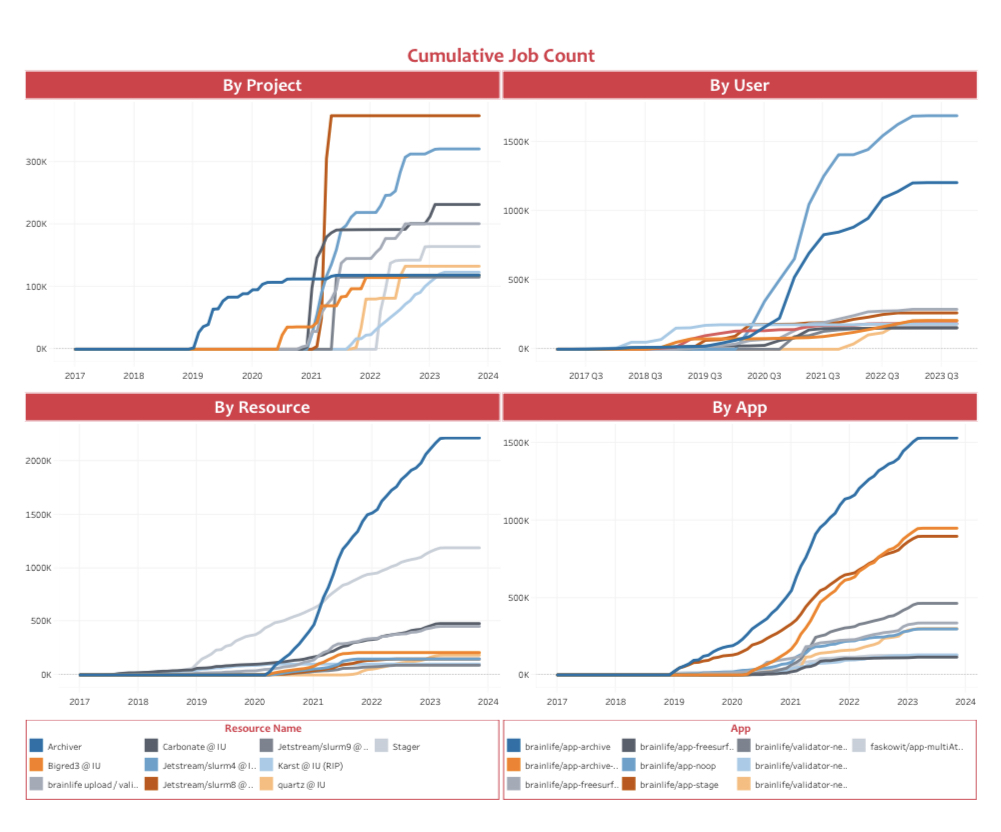

Figure 20. Jobs broken down by project, user, resource, and app.

## **3.4 Discussion**
- These dashboards will allow Brainlife administrators and users to explore the usage of the BL platform over time.
- Now that the dashboards are created in Tableau, they need to be linked to the Brainlife website so that any BL user can see these visualizations.
- The datasets also need to be linked to current BL data so that the charts update automatically based on current data.

# **Works Cited**
- Aydogan, Dogu Baran, and Yonggang Shi. 2021. “Parallel Transport Tractography.” IEEE Transactions on Medical Imaging 40 (2): 635.

- Çiçek, Özgün, Ahmed Abdulkadir, Soeren S. Lienkamp, Thomas Brox, and Olaf Ronneberger. 2016. “3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation.” Medical Image Computing and Computer-Assisted Intervention: MICCAI ... International Conference on Medical Image Computing and Computer-Assisted Intervention, 424–32.

- Garyfallidis, Eleftherios, Matthew Brett, Marta Morgado Correia, Guy B. Williams, and Ian Nimmo-Smith. 2012. “QuickBundles, a Method for Tractography Simplification.” Frontiers in Neuroscience 6.

- Jeurissen, Ben, Maxime Descoteaux, Susumu Mori, and Alexander Leemans. 2019. “Diffusion MRI Fiber Tractography of the Brain.” NMR in Biomedicine 32 (4): e3785.

- Takemura, Hiromasa, Cesar F. Caiafa, Brian A. Wandell, and Franco Pestilli. 2016. “Ensemble Tractography.” PLoS Computational Biology 12 (2): e1004692.

- Takemura, Hiromasa, Franco Pestilli, Kevin S. Weiner, Georgios A. Keliris, Sofia M. Landi, Julia Sliwa, Frank Q. Ye, et al. 2017. “Occipital White Matter Tracts in Human and Macaque.” Cerebral Cortex  27 (6): 3346–59.

- Tournier, J-Donald, Fernando Calamante, and Alan Connelly. 2012. “MRtrix: Diffusion Tractography in Crossing Fiber Regions.” International Journal of Imaging Systems and Technology 22 (1): 53–66.

- “TractSeg - Fast and Accurate White Matter Tract Segmentation.” 2018. NeuroImage 183 (December): 239–53.
